In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

### Exercise 3 
At http://www.coindesk.com you can download the daily
price of a BitCoin as a CSV file.  Read this file and compute
the spectrum of BitCoin prices as a function of time.
Does it resemble white, pink, or Brownian noise?

在http://www.coindesk.com上，您可以將BitCoin的每日價格下載為CSV文件。 閱讀此文件，併計算隨時間變化的比特幣價格範圍。 它類似於白色，粉紅色或布朗噪聲嗎？

![](fg/fg_bit_coin_price.png)


In [54]:
#oriCsv= 'coindesk-bpi-USD-close.csv'
ryCsv=  'BTC_USD_2013-10-01_2020-04-30-CoinDesk.csv'


In [55]:
df = pd.read_csv(ryCsv) #, nrows=1625, parse_dates=[0])
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [53]:
df.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [15]:
ys = df['Closing Price (USD)'].values
ts = np.arange(len(ys)) #df['Date'].values

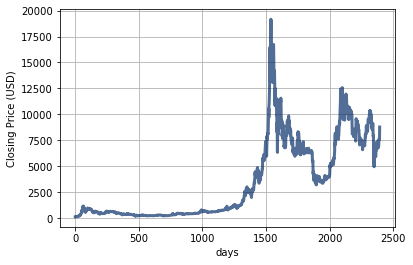

In [16]:
wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='Closing Price (USD)')
thinkplot.config(xlabel='days') #'Time (days)')

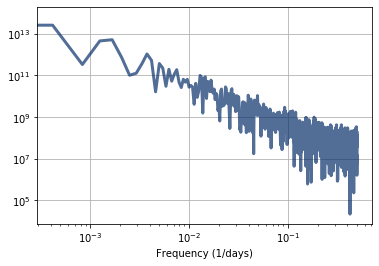

In [17]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (1/days)',
                 xscale='log', yscale='log')

The slope is -1.8, which is similar to red noise (which should have a slope of -2).

斜率為-1.8，類似於紅色噪聲（斜率應為-2）。

In [18]:
spectrum.estimate_slope()

LinregressResult(slope=-1.7350194331091342, intercept=15.867033087139772, rvalue=-0.8125798405339089, pvalue=1.9651614611482885e-282, stderr=0.03600071045967323)